<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />
# Exploratory Data Analysis for IPL Cricket Seasons 


  # By:- Alok & Ashish

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [Top 3 teams across seasons ?](#section401)<br/>
    - 4.2 [Top 3 players across seasons?](#section402)<br/>
    - 4.3 [Winning runs range with respect to toss decision?](#section403)<br/>
    - 4.4 [Winning runs range with respect to winners across seasons?](#section404)<br/>
    - 4.5 [Winning matches by specific range of runs for top 2 teams across seasons.](#section405)<br/>
    - 4.6 [Frequency of Winning matches by wickets across seasons](#section406)<br/>
    - 4.7 [Winning matches by wickets with respect to toss decision as fielding across seasons.](#section407)<br/>
    - 4.8 [Winning matches by wickets with respect to top 2 winners.](#section409)<br/>
        - 4.8.1 [Scatter plot for win by wickets for Mumbai Indians](#section415)<br/>
        - 4.8.2 [Scatter plot for win by wickets for Chennai Super Kings](#section416)<br/>
    - 4.9 [Does geographical location effects winning equation](#section410)<br/>
        - 4.9.1 [In Which top 5 cities matches were played the most between Mumbai and Chennai?](#section411)<br/>
        - 4.9.2 [Did any of the team got home ground advantage ?](#section412)<br/>
    - 4.10 [Hypothesis: Mumbai Indians Performed better than Chennai Super Kings across the seasons](#section413)<br/>
    
5. [Conclusions](#section5)<br/>  

<a id=section1></a>
### 1. Problem Statment  
<img src="https://github.com/ashiish07/IPL_Matches_Case_Study/blob/master/img/1523096099-ipl-2018-hotstar.jpg?raw=true" width="240" height="360" />

<b>This dataset is survey that shows how teams performed in IPL. We are considering performance of top 2 teams (Mumbai Indians and Chennai Super Kings) against each other. </b>

<a id=section2></a>

### 2. Data Loading and Description

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

ipl_mat_data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/matches.csv') 
ipl_mat_data.head()
# read_csv is used to read csv file
#ipl_mat_data.describe(include = 'all')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
print("Maximum value: ", ipl_mat_data["win_by_runs"].max()) 

Maximum value:  146


<a id=section4></a>

- The dataset consists of the information about IPL cricket match across the season. Various variables present in the dataset includes data of IPL season year, Date, Team, Winner,Toss Decision etc. 
- The dataset comprises of __696 observations of 18 columns__.

#### Some Background Information

The Indian Premier League (IPL), is a professional Twenty20 cricket league in India contested during April and May of every year by teams representing Indian cities and some states.
The league was founded by the Board of Control for Cricket in India (BCCI) in 2008, and is regarded as the brainchild of Lalit Modi, the founder and former commissioner of the league.

The IPL is the most-attended cricket league in the world and in 2014 ranked sixth by average attendance among all sports leagues.
In 2010,the IPL became the first sporting event in the world to be broadcast live on YouTube.
The brand value of IPL in 2018 was 6.3 billion US dollors, according to Duff & Phelps.
According to BCCI, the 2015 IPL season contributed 11.5 billion (US$182 million) to the GDP of the Indian economy.

There have been eleven seasons of the IPL tournament. The current IPL title holders are the Chennai Super Kings, who won the 2018 season.
The most successful franchises in the tournament are the Chennai Super Kings and Mumbai Indians with 3 tournament wins each.

In [64]:
ipl_mat_data.describe( )

,id,season,dl_applied,win_by_runs,win_by_wickets
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,974.103448,2012.965517,0.027299,13.472701,3.349138
std,2143.239623,3.069266,0.163070,23.607994,3.411398
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,174.750000,2010.000000,0.000000,0.000000,0.000000
50%,348.500000,2013.000000,0.000000,0.000000,3.000000
75%,522.250000,2016.000000,0.000000,19.000000,6.000000
max,7953.000000,2018.000000,1.000000,146.000000,10.000000


####  Match winning count of each team across all the seasons.

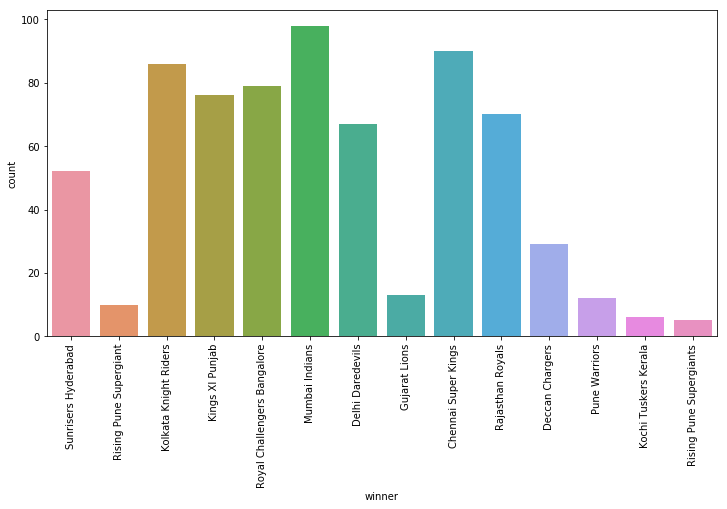

In [67]:
plt.figure(figsize=(12,6))
sns.countplot(x='winner', data=ipl_mat_data)
plt.xticks(rotation='vertical')
plt.show()

#### Observation
- Mumbai Indians has won maximum number of matches



<a id=section3></a>
### 3. Data Profiling

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end 

In [8]:
ipl_mat_data.shape            

(696, 17)

ipl match data has __696 rows__ and __17 columns.__

In [9]:
ipl_mat_data.columns  

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

<a id=section301></a>
### 3.1 Understanding the Dataset

In [3]:
ipl_mat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
id                 696 non-null int64
season             696 non-null int64
city               689 non-null object
date               696 non-null object
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             693 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
umpire1            695 non-null object
umpire2            695 non-null object
umpire3            60 non-null object
dtypes: int64(5), object(13)
memory usage: 98.0+ KB


<a id=section302></a>
### 3.2 Pre Profiling

In [5]:
#missing data
total = ipl_mat_data.isnull().sum().sort_values(ascending=False)
percent = (ipl_mat_data.isnull().sum()/ipl_mat_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                 Total   Percent
umpire3            636  0.913793
city                 7  0.010057
player_of_match      3  0.004310
winner               3  0.004310
umpire1              1  0.001437
umpire2              1  0.001437
toss_winner          0  0.000000
season               0  0.000000
date                 0  0.000000
team1                0  0.000000
team2                0  0.000000
result               0  0.000000
toss_decision        0  0.000000
dl_applied           0  0.000000
win_by_runs          0  0.000000
win_by_wickets       0  0.000000
venue                0  0.000000
id                   0  0.000000


#### Observation: There are 91.3 % missing data of 3rd Umpire hence we are going to drop it .

In [8]:
#dealing with missing data
#Let’s get rid of the variable umpire3 just to make our lives easier.
ipl_mat_data = ipl_mat_data.drop(['umpire3'], axis= 1)


#ipl_mat_data.isnull().sum().max() #just checking that there's no missing data missing...
ipl_mat_data.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


<a id=section303></a>
### 3.3 Standardize all column headers to lower case 

In [9]:
ipl_mat_data.columns = map(str.lower, ipl_mat_data.columns)     # map() function returns a list of results after applying the given function
                                                                # to each item of a given iterable.
ipl_mat_data.dtypes         

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
dtype: object

<a id=section304></a>
## 3.4 Post Pandas Profiling

In [10]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(ipl_mat_data)
profile

Number of variables,17
Number of observations,696
Total Missing (%),0.1%
Total size in memory,92.5 KiB
Average record size in memory,136.1 B
Numeric,4
Categorical,12
Boolean,1
Date,0
Text (Unique),0
Rejected,0


### Data filtering based on some conditions

In [13]:
 ipl_mum_win=ipl_mat_data[(ipl_mat_data['winner'] == 'Mumbai Indians') & (ipl_mat_data['city'] =='Mumbai')]#.count()
ipl_mum_win
# here we are selecting data for MI , where  MI won on their home ground.
                        

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan
15,16,2017,Mumbai,2017-04-16,Gujarat Lions,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,N Rana,Wankhede Stadium,A Nand Kishore,S Ravi
23,24,2017,Mumbai,2017-04-22,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi
36,37,2017,Mumbai,2017-05-01,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,bat,normal,0,Mumbai Indians,0,5,RG Sharma,Wankhede Stadium,AK Chaudhary,CB Gaffaney
81,82,2008,Mumbai,2008-05-04,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,29,0,SM Pollock,Dr DY Patil Sports Academy,IL Howell,RE Koertzen
85,86,2008,Mumbai,2008-05-07,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,7,A Nehra,Dr DY Patil Sports Academy,DJ Harper,RE Koertzen
95,96,2008,Mumbai,2008-05-14,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,ST Jayasuriya,Wankhede Stadium,BR Doctrove,AM Saheba
98,99,2008,Mumbai,2008-05-16,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,SM Pollock,Wankhede Stadium,BR Doctrove,DJ Harper
175,176,2010,Mumbai,2010-03-13,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Mumbai Indians,4,0,YK Pathan,Brabourne Stadium,RE Koertzen,RB Tiffin


#### Observation: 

out of 98 match win by MI ,48 played at Mumbai -- 48.97 % won @home ground. It shows that mumbai indians got home ground advantage

In [14]:
ipl_mat_Chen=ipl_mat_data[(ipl_mat_data['winner'] == 'Chennai Super Kings') & (ipl_mat_data['city'] =='Chennai')]

ipl_mat_Chen

# here we are selecting data for CSK , where  CSK won on their home ground.

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
66,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar
70,71,2008,Chennai,2008-04-26,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,0,Chennai Super Kings,0,9,JDP Oram,"MA Chidambaram Stadium, Chepauk",BF Bowden,AV Jayaprakash
90,91,2008,Chennai,2008-05-10,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Chennai Super Kings,18,0,L Balaji,"MA Chidambaram Stadium, Chepauk",AV Jayaprakash,BG Jerling
201,202,2010,Chennai,2010-03-31,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,bat,normal,0,Chennai Super Kings,0,5,M Vijay,"MA Chidambaram Stadium, Chepauk",BG Jerling,RE Koertzen
205,206,2010,Chennai,2010-04-03,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,normal,0,Chennai Super Kings,23,0,M Vijay,"MA Chidambaram Stadium, Chepauk",RE Koertzen,RB Tiffin
210,211,2010,Chennai,2010-04-06,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,24,0,SK Raina,"MA Chidambaram Stadium, Chepauk",S Asnani,DJ Harper
221,222,2010,Chennai,2010-04-13,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,0,Chennai Super Kings,0,9,R Ashwin,"MA Chidambaram Stadium, Chepauk",SS Hazare,SJA Taufel
234,235,2011,Chennai,2011-04-08,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Chennai Super Kings,2,0,S Anirudha,"MA Chidambaram Stadium, Chepauk",BR Doctrove,PR Reiffel
247,248,2011,Chennai,2011-04-16,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,21,0,MEK Hussey,"MA Chidambaram Stadium, Chepauk",HDPK Dharmasena,AL Hill
261,262,2011,Chennai,2011-04-25,Chennai Super Kings,Pune Warriors,Pune Warriors,field,normal,0,Chennai Super Kings,25,0,MEK Hussey,"MA Chidambaram Stadium, Chepauk",Aleem Dar,RB Tiffin


#### Observation

Out of 90 matches win by CSK ,34 played by CSK at Chennai --37.77 % won @home ground. This shows that Mumbai indians got more home field advantage as compared to CSK

### 4. Questions

<a id=section401></a>

 #### 4.1. Top 3 teams across seasons ?

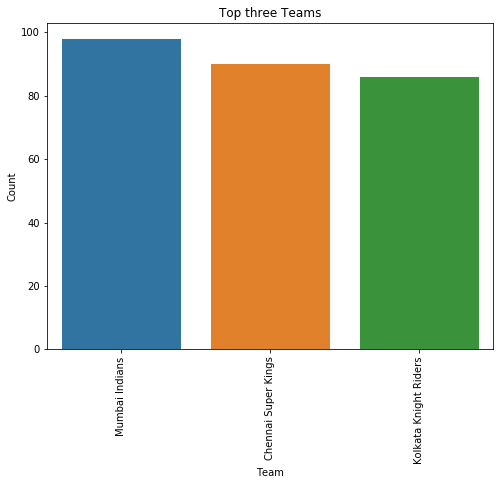

In [18]:

# top 3 teams across the seasons
from collections import Counter
team_count = Counter(ipl_mat_data['winner'].dropna().tolist()).most_common(3)
team_idx = [team[0] for team in team_count]
team_val = [team[1] for team in team_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = team_idx,y=team_val ,ax =ax)
plt.title('Top three Teams')
plt.xlabel('Team')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)




#### Observation
Above graph shows top 3 teams across the seasons and Mumbai Indian is leading.

<a id=section402></a>

### 4.2 Top 3 players across seasons ?

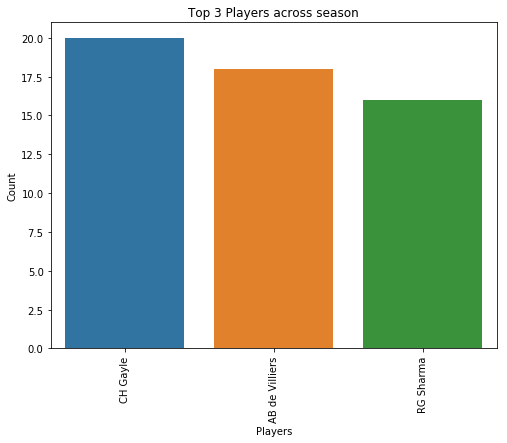

In [19]:
# top 3 players across the seasons

pom_count = Counter(ipl_mat_data['player_of_match'].dropna().tolist()).most_common(3)
pom_idx = [pom[0] for pom in pom_count]
pom_val = [pom[1] for pom in pom_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = pom_idx,y=pom_val ,ax =ax)
plt.title('Top 3 Players across season')
plt.xlabel('Players')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

#### Observation
Above graph shows top 3 players across the seasons and RG Sharma from Mumbai Indians is most valuable player for Mumbai Indians.

<a id=section403></a>

### 4.3 Winning runs range with respect to toss decision ?

Text(0.5,1,'Winning Runs Range vs Toss Decision')

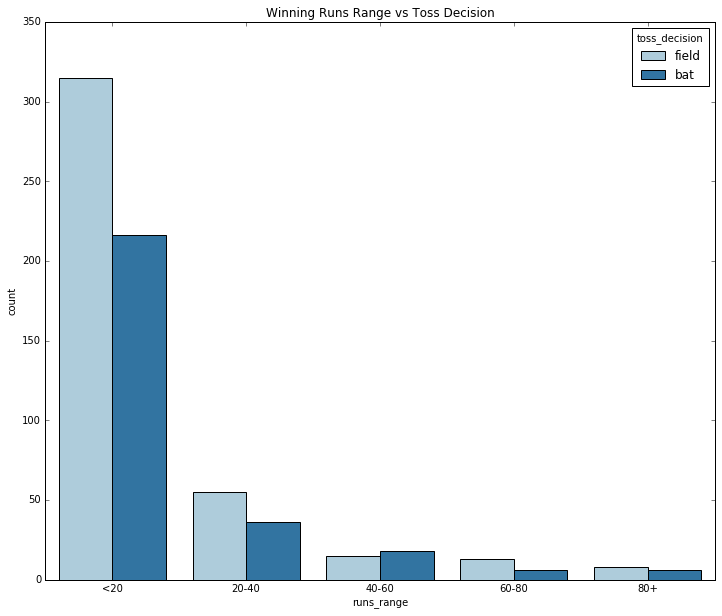

In [25]:
# winnng runs range wrt toss decision
ipl_mat_data['runs_range'] = pd.cut(ipl_mat_data['win_by_runs'].dropna(),
                         [0,20,40,60,80,100],
                         labels=['<20','20-40','40-60','60-80','80+'], include_lowest=True)

fig,ax =plt.subplots(figsize=(12,10))
sns.countplot(data = ipl_mat_data,x = 'runs_range', hue='toss_decision',palette="Paired")
plt.title('Winning Runs Range vs Toss Decision')

#### Observation
Whenever team has chosen to field first,maximum matches were won by margin of less than 20 runs and were close matches.
it also says when maximum matches where chosen to bat first, then winning margin of 40-60 was maximum.


<a id=section404></a>

### 4.4 Winning runs range with respect to winners across seasons ?

Text(0.5,1,'Winning Runs Range for top 2 teams')

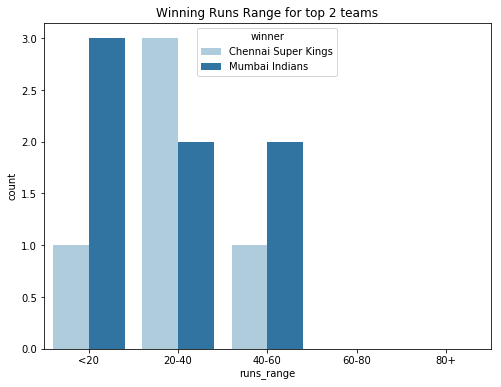

In [40]:
# winnng runs range wrt top2 winners across the seasons

ipl_mat_data_top2_winner_by_runs=ipl_mat_data[(ipl_mat_data['season'].between(2008,2018)) & (((ipl_mat_data['team1']=='Mumbai Indians') & (ipl_mat_data['team2']=='Chennai Super Kings')) 
                        | ((ipl_mat_data['team1']=='Chennai Super Kings') & (ipl_mat_data['team2']=='Mumbai Indians'))) & ((ipl_mat_data['win_by_runs'] >=1) 
                        & (ipl_mat_data['win_by_wickets']==0))]

ipl_mat_data_top2_winner_by_runs['runs_range'] = pd.cut(ipl_mat_data_top2_winner_by_runs['win_by_runs'].dropna(),
                         [0,20,40,60,80,100],
                         labels=['<20','20-40','40-60','60-80','80+'], include_lowest=True)

fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = ipl_mat_data_top2_winner_by_runs,x = 'runs_range', hue='winner',palette="Paired")
plt.title('Winning Runs Range for top 2 teams')

#### Observation

It depicts Mumbai Indians dominated in close matches (<20 runs margin) as well as higher runs margin of 40-60 runs

<a id=section405></a>

### 4.5 Winning matches by specific range of runs for top 2 teams across seasons ?

Text(0.5,1,'Count plot for win by runs for top 2 teams when choosen to bat')

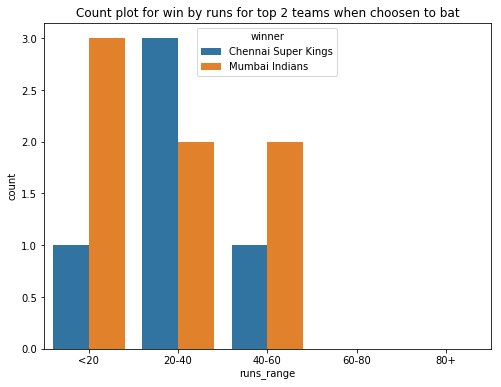

In [22]:
#frequency of winning matches by specific range of runs when toss decision was batting 


ipl_mat_data_winner_by_runs_toss_bat=ipl_mat_data[(ipl_mat_data['season'].between(2008,2018)) & (((ipl_mat_data['team1']=='Mumbai Indians') & (ipl_mat_data['team2']=='Chennai Super Kings')) 
                        | ((ipl_mat_data['team1']=='Chennai Super Kings') & (ipl_mat_data['team2']=='Mumbai Indians'))) & (((ipl_mat_data['win_by_runs'] >=1) 
                        & (ipl_mat_data['win_by_wickets']==0)))]

ipl_mat_data_winner_by_runs_toss_bat['runs_range'] = pd.cut(ipl_mat_data_winner_by_runs_toss_bat['win_by_runs'].dropna(),
                         [0,20,40,60,80,100],
                         labels=['<20','20-40','40-60','60-80','80+'], include_lowest=True)


fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = ipl_mat_data_winner_by_runs_toss_bat,x = 'runs_range', hue='winner')
plt.title('Count plot for win by runs for top 2 teams')


#### Observation

it depicts toss decision for batting didn't made much impact on winning by runs margin. But still Mumbai Indain has registered good win whenever there are close matches (< 20 runs margin).

<a id=section406></a>

### 4.6 Frequency of Winning matches by wickets across seasons ?

<a id=section407></a>

Text(0.5,1,'Count plot for win by wickets across seasons.')

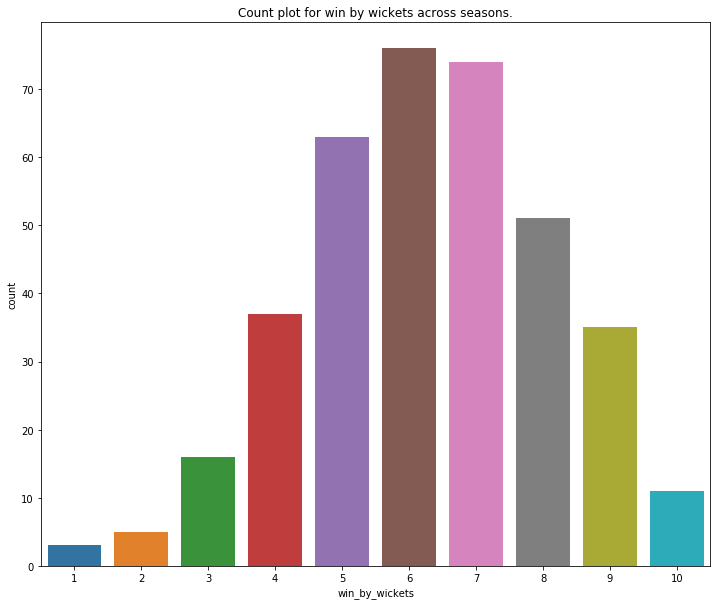

In [3]:
#frequency of winning matches by wickets across all seasons

ipl_mat_data_by_wickets = ipl_mat_data[(ipl_mat_data['season'].between(2008,2018)) & ((ipl_mat_data['win_by_wickets'] >= 1)) &
                           (ipl_mat_data['win_by_runs'] == 0)]
fig,ax =plt.subplots(figsize=(12,10))
sns.countplot(x='win_by_wickets', data=ipl_mat_data_by_wickets).set_title('Count plot for win by wickets across seasons.')


#### Observation: 
Most of the team win by  between 4 to 8 wickets. it shows that in IPL batsman dominate and it will be helpful on auction to select good batsman/all rounder as compare to bowler.

### 4.7 Winning matches by wickets with respect to toss decision as fielding across seasons ?

Text(0.5,1,'Count plot for win by wickets when choosen to field.')

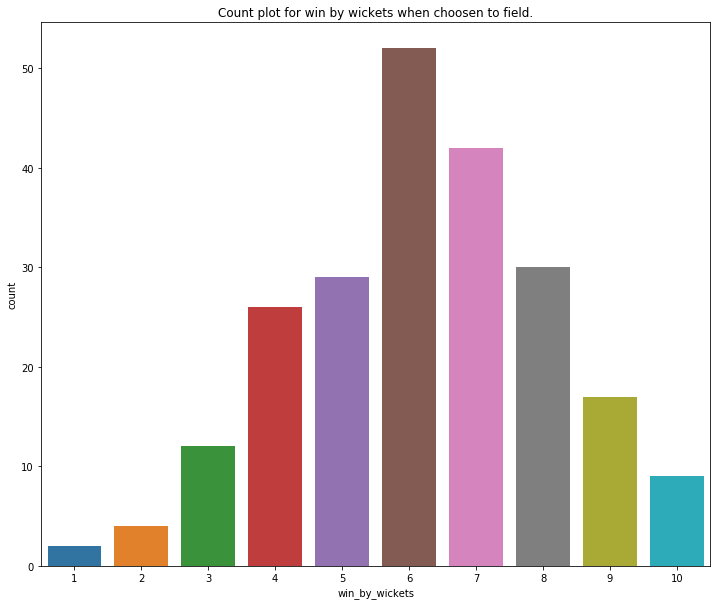

In [45]:
#frequency of winning matches by wickets when toss decision was fielding 
toss_field_by_wickets = ipl_mat_data[(ipl_mat_data['season'].between(2008,2018)) & ((ipl_mat_data['win_by_wickets'] >= 1) &
                           (ipl_mat_data['win_by_runs'] == 0) & (ipl_mat_data['toss_decision'] == 'field'))]
fig,ax =plt.subplots(figsize=(12,10))
sns.countplot(x='win_by_wickets', data=toss_field_by_wickets).set_title('Count plot for win by wickets when choosen to field.')


#### Observation: 
Most of the team win by between 4 to 8 wickets. it shows that in IPL batsman dominate and it will be helpful on auction to select good batsman/all rounder as compare to bowler.
Batsman dominated the seasons.

<a id=section408></a>

<a id=section409></a>

### 4.8 Winning matches by wickets with respect to top 2 winners ?

Text(0.5,1,'bywickets vs winner')

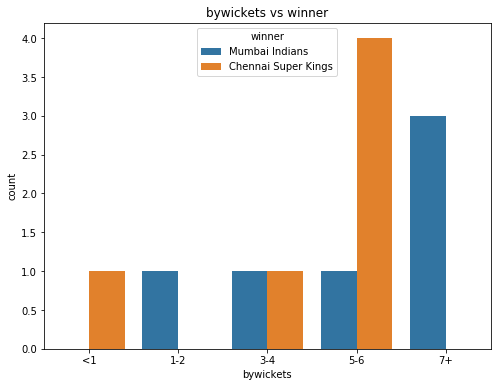

In [15]:
# win by wickets wrt winner

ipl_mat_data_winner_by_wickets=ipl_mat_data[(ipl_mat_data['season'].between(2008,2018)) & (((ipl_mat_data['team1']=='Mumbai Indians') & (ipl_mat_data['team2']=='Chennai Super Kings')) 
                        | ((ipl_mat_data['team1']=='Chennai Super Kings') & (ipl_mat_data['team2']=='Mumbai Indians'))) & ((ipl_mat_data['win_by_runs'] ==0) 
                        & (ipl_mat_data['win_by_wickets']>=1))]

ipl_mat_data_winner_by_wickets

pd.set_option('display.max_columns', 100) 
ipl_mat_data_winner_by_wickets['bywickets'] = pd.cut(ipl_mat_data_winner_by_wickets['win_by_wickets'].dropna(),
                         [0,1,3,5,7,9],
                         labels=['<1','1-2','3-4','5-6','7+'], include_lowest=True)

fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = ipl_mat_data_winner_by_wickets,x = 'bywickets', hue='winner')
plt.title('bywickets vs winner')
#plt.style.available



#### Observation:
Mumbai indians won more than 7 wickets three times shows their strong batting line up. But Chennai also won 4 matches within 5-6 wickets range which depicts chennai gave good challange to Mumbai Indians.

<a id=section415></a>

#### 4.8.1 Scatter plot for win by wickets for Mumbai Indians


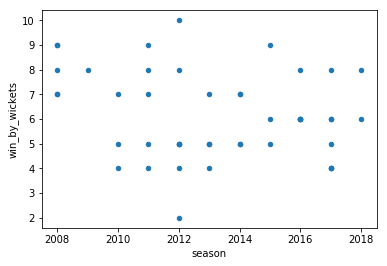

In [41]:
# for Mumbai Indians
#sns.swarmplot(x="season", y="winner", palette="gnuplot", data=ipl_mat_data)
ipl_mat_data[(ipl_mat_data['win_by_wickets'] >=1) & (ipl_mat_data['winner']=='Mumbai Indians')].plot.scatter(x='season', y='win_by_wickets')

<a id=section416></a>

#### 4.8.2 Scatter plot for win by wickets for Chennai Super Kings

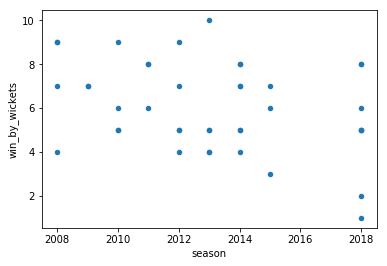

In [40]:
ipl_mat_data[(ipl_mat_data['win_by_wickets'] >=1) & (ipl_mat_data['winner']=='Chennai Super Kings')].plot.scatter(x='season', y='win_by_wickets')

#### Observations
If we see win by wickets scatter plot for top 2 team across the season (2008-2018), then it seems Mumbai Indians has performed better in chasing than chennai.

In [10]:
mat.style.use('classic')

Text(0.5,1,'Correlation between features')

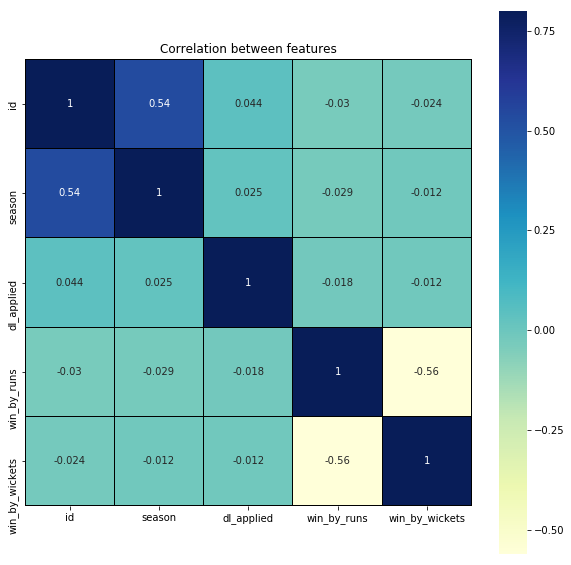

In [20]:
corr = ipl_mat_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')



<a id=section410></a>

### 4.9 Does geographical location effects winning equation ?

<a id=section411></a>

#### 4.9.1. In Which top 5 cities matches were played the most between Mumbai and Chennai?

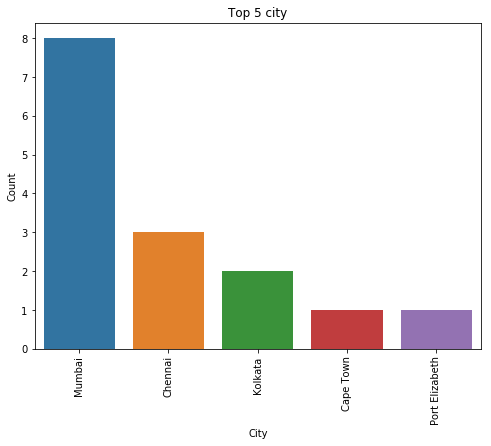

In [71]:
# city effects the winning equation b/w Mumbai Indians & Chennai Super Kings

ipl_mat_data_top2_winner_venue=ipl_mat_data[(ipl_mat_data['season'].between(2008,2018)) & ((ipl_mat_data['team1']=='Mumbai Indians') & (ipl_mat_data['team2']=='Chennai Super Kings')) 
                        | ((ipl_mat_data['team1']=='Chennai Super Kings') & (ipl_mat_data['team2']=='Mumbai Indians')) & ((ipl_mat_data['win_by_runs'] >=1) 
                        & (ipl_mat_data['win_by_wickets']==0))]


from collections import Counter
city_count = Counter(ipl_mat_data_top2_winner_venue['city'].dropna().tolist()).most_common(5)
city_idx = [country[0] for country in city_count]
city_val = [country[1] for country in city_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = city_idx,y=city_val ,ax =ax)
plt.title('Top 5 city')
plt.xlabel('City')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)


In [69]:
#Maximum matches conducted at mumbai as ticket sells very fast (2)based on toss decsison what will be the winning percentage / umpire wise.
#hypothesis : overall performance at mumbai /chennai.

#### Observations
Mumbai is the favorite venue for ipl and mumbai wins most of the matches in his homeground that helped them to decide the strategy.

In [68]:

ipl_mat_data_top2_winner_venue=ipl_mat_data[(ipl_mat_data['season'].between(2008,2018)) & (((ipl_mat_data['team1']=='Mumbai Indians') & (ipl_mat_data['team2']=='Chennai Super Kings')) 
                        | ((ipl_mat_data['team1']=='Chennai Super Kings') & (ipl_mat_data['team2']=='Mumbai Indians'))) & ((ipl_mat_data['win_by_runs'] >=1) 
                        & (ipl_mat_data['win_by_wickets']==0))]
ipl_mat_data_top2_winner_venue.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
66,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
117,118,2009,Cape Town,2009-04-18,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,19,0,SR Tendulkar,Newlands,BR Doctrove,K Hariharan,NaN
210,211,2010,Chennai,2010-04-06,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,24,0,SK Raina,"MA Chidambaram Stadium, Chepauk",S Asnani,DJ Harper,NaN
233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,NaN
256,257,2011,Mumbai,2011-04-22,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,8,0,Harbhajan Singh,Wankhede Stadium,Asad Rauf,AM Saheba,NaN


<a id=section412></a>

#### 4.9.2. Did any of the team got home ground advantage ?

Text(0.5,1,'Factor plot for Mumbai Indians and Chennai Super Kings winning by runs in diff cities')

<Figure size 1080x576 with 0 Axes>

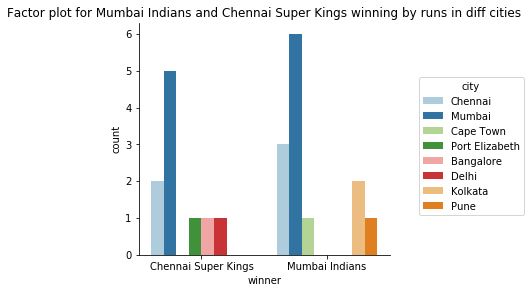

In [27]:
# venue effects the winning equation b/w Mumbai Indians & Chennai Super Kings when win was by runs

ipl_mat_data_top2_winner_venue=ipl_mat_data[(ipl_mat_data['season'].between(2008,2018)) & (((ipl_mat_data['team1']=='Mumbai Indians') & (ipl_mat_data['team2']=='Chennai Super Kings')) 
                        | ((ipl_mat_data['team1']=='Chennai Super Kings') & (ipl_mat_data['team2']=='Mumbai Indians')))]

ipl_mat_data_top2_winner_venue

#mat.rc("figure", figsize=(20, 10))
plt.figure(figsize=(15,8))
sns.factorplot('winner', hue='city', kind='count', data=ipl_mat_data_top2_winner_venue, palette="Paired");
plt.title('Factor plot for Mumbai Indians and Chennai Super Kings in diff cities')



#### Observations

Mumbai Indians performed better than Chennai , Also Mumbai Indians got more advantage of home ground as compared to Chennai Super Kings and its performance is good in other cities also than Chennai Super Kings.

Text(0.5,1,'Factor plot for Mumbai Indians and Chennai Super Kings winning by wickets in diff cities')

<Figure size 1080x576 with 0 Axes>

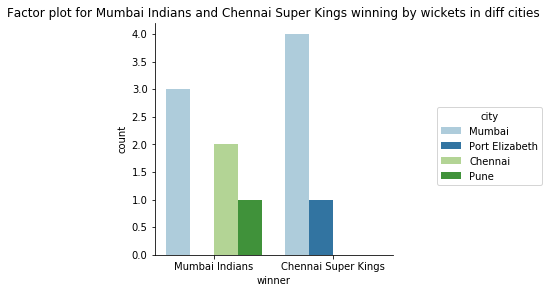

In [11]:
# venue effects the winning equation b/w Mumbai Indians & Chennai Super Kings (win by wickets

ipl_mat_data_top2_winner_venue_wickets=ipl_mat_data[(ipl_mat_data['season'].between(2008,2018)) & (((ipl_mat_data['team1']=='Mumbai Indians') & (ipl_mat_data['team2']=='Chennai Super Kings')) 
                        | ((ipl_mat_data['team1']=='Chennai Super Kings') & (ipl_mat_data['team2']=='Mumbai Indians'))) & ((ipl_mat_data['win_by_runs'] ==0) 
                        & (ipl_mat_data['win_by_wickets']>=1))]


mat.rc("figure", figsize=(20, 10))
plt.figure(figsize=(15,8))
sns.factorplot('winner', hue='city', kind='count', data=ipl_mat_data_top2_winner_venue_wickets, palette="Paired");
plt.title('Factor plot for Mumbai Indians and Chennai Super Kings winning by wickets in diff cities')

#### Observations

Mumbai got more advantage of home ground as compared to Chennai Super Kings as Chennai Super Kings didn't got any victory in chennai. Although Chennai got more wins in mumbai as compared to Mumbai.

Text(0.5,1,'Winner (Chennai Super Kings)')

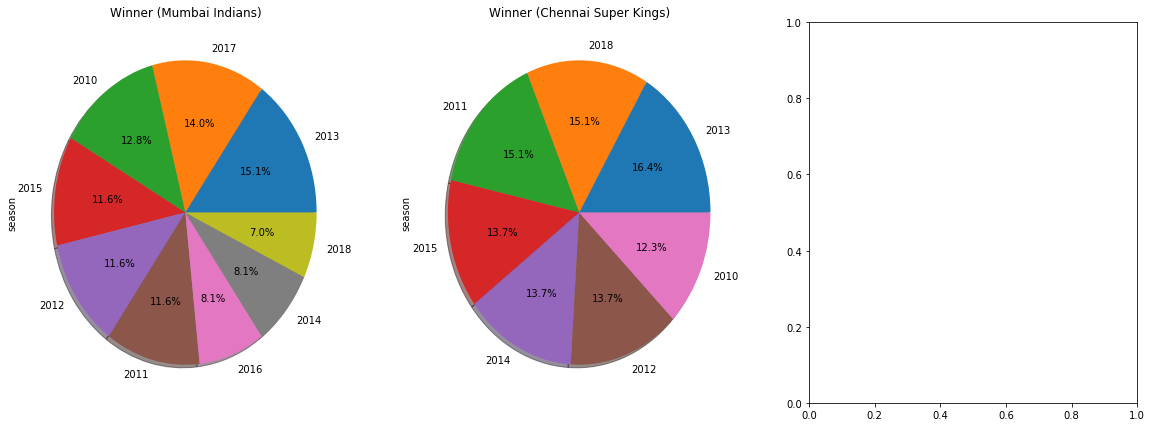

In [30]:
ipl_mat_data_season = ipl_mat_data[ipl_mat_data['season'].between(2010,2018)]
#ipl_mat_data_season

f,ax = plt.subplots(1,3,figsize=(20,7))
ipl_mat_data_season['season'][ipl_mat_data_season['winner'] == 'Mumbai Indians'].value_counts().plot.pie(explode=None,autopct='%1.1f%%',ax=ax[0],shadow=True)
ipl_mat_data_season['season'][ipl_mat_data_season['winner'] == 'Chennai Super Kings'].value_counts().plot.pie(explode=None,autopct='%1.1f%%',ax=ax[1],shadow=True)
#titanic_data['Survived'][titanic_data['GenderClass'] == 'male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Winner (Mumbai Indians)')
ax[1].set_title('Winner (Chennai Super Kings)')

#### Observation:
It shows the season wise winning percentage of Mumbai Indians and Chennai Super Kings. Overall Mumbai Indians has performed well but we also noticed that since CSK was banned for two season so Mumbai Indians took benefit of it as it won IPL season of 2017.

In [37]:
ipl_mat_data_Mum=ipl_mat_data[(ipl_mat_data['season'].between(2010,2018)) & ((ipl_mat_data['team1']=='Mumbai Indians') |
                              (ipl_mat_data['team2']=='Mumbai Indians')) & (ipl_mat_data['winner'] == 'Mumbai Indians')]
                               
ipl_mat_data_Mum.count() # 171 match played by Mumbai won 98  ---winning percentage 57.30%


ipl_mat_data_Chen=ipl_mat_data[(ipl_mat_data['season'].between(2010,2018)) & (((ipl_mat_data['team1']=='Chennai Super Kings')) |
                            (ipl_mat_data['team2']=='Chennai Super Kings')) & (ipl_mat_data['winner'] == 'Chennai Super Kings')]

ipl_mat_data_Chen.describe() #147 match played by chennai out of which 90 won by chennai---winning percentagr 61.2%

,id,season,dl_applied,win_by_runs,win_by_wickets
count,73.000000,73.000000,73.0,73.000000,73.000000
mean,1519.767123,2013.356164,0.0,18.260274,2.808219
std,2718.668508,2.502054,0.0,26.625503,3.256010
min,182.000000,2010.000000,0.0,0.000000,0.000000
25%,304.000000,2011.000000,0.0,0.000000,0.000000
50%,418.000000,2013.000000,0.0,2.000000,0.000000
75%,530.000000,2015.000000,0.0,25.000000,5.000000
max,7953.000000,2018.000000,0.0,97.000000,10.000000


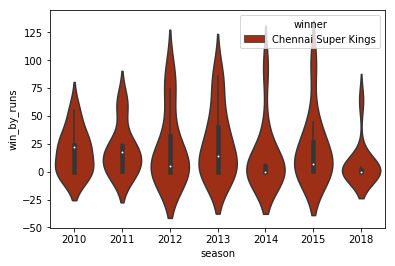

In [38]:
sns.violinplot(x="season", y="win_by_runs",hue="winner", palette="gnuplot", size=4,data=ipl_mat_data_Chen)

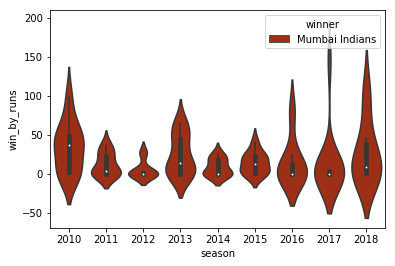

In [39]:
sns.violinplot(x="season", y="win_by_runs",hue="winner", palette="gnuplot", size=4,data=ipl_mat_data_Mum)

#### Observations
If we see win by wickets scatter plot, then it seems chennai has performed good in chasing where as chennai has won most of the matches by runs below or around 60 runs which concludes that they have a good batting line-up.

<a id=section413></a>

### 4.10 Hypothesis: Mumbai Indians Performed better than Chennai Super Kings across the season

As per  
__section 4.9.2__ (win_by_wickets, win_by_runs)
We came to conclusion that Mumbai Indians got more home ground advantage than Chennai Super Kings
.<br/>
__section 3__: Out of __98__ matches win by MI ,__48__ were played at Mumbai -- __48.97__ % won @home ground. This shows that Mumbai Indians got home ground advantage
.<br/>
Out of __90__ matches win by CSK ,__34__ played by CSK at Chennai --__37.77__ % won @home ground. This shows that Mumbai 
Indians got more home field advantage as compared to CSK.<br/>


<a id=section5></a>

### 5. Conclusion

From the analyis, it was concluded that __Mumbai Indians__, performed better than __Chennai Super Kings__.(__Collectively From: section 3, 4.5, 4.9.2, 4.9.1__). Although Chennai Super Kings was banned for seasons 2016,2017, but still its winning percentage is 61% and it seems it gave tough competition to all the opponents.